# NFL Score Predictions

## 0. Import libraries, Read in Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/nfl_games.csv')
data = data.dropna()

## 0.2 Adding a feature
- score_diff is added to the data set as it could be helpful in indicating if team1 won and the points they won/lost by

In [2]:
score_diff = data['score1']-data['score2']
data_2 = data
data_2.insert(11, "score_diff", score_diff)
data_2

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,score_diff,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947000,1300.000000,0.824651,48,0,48,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420000,1300.000000,0.824212,43,0,43,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420000,1300.000000,0.824212,10,0,10,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002000,1504.908000,0.575819,14,0,14,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108000,1478.004000,0.644171,45,0,45,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16269,2019-01-13,2018,0,1,NE,LAC,1640.171960,1647.624483,0.582068,41,28,13,1.0
16270,2019-01-13,2018,0,1,NO,PHI,1669.105861,1633.114673,0.641378,20,14,6,1.0
16271,2019-01-20,2018,0,1,NO,LAR,1682.450194,1648.424105,0.638772,23,26,-3,0.0
16272,2019-01-20,2018,0,1,KC,NE,1675.286412,1661.668566,0.611248,31,37,-6,0.0


## Ⅰ.Exploratory data analysis

###  1. Univariate : result1
- Counting and ploting the result of each game
- 1 indicates team1 winning & vice versa

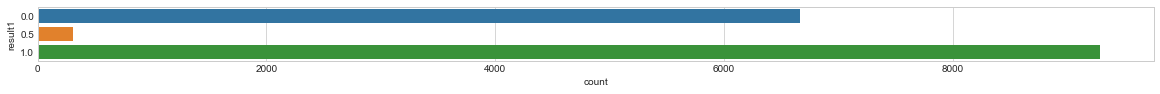

In [3]:
import math
import seaborn as sns

dataset_bin = pd.DataFrame()
dataset_bin['result1'] = data_2['result1']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="result1", data=dataset_bin);

### 2. Univariate : elo_prob1
- Ploting the distribution of the probability for team1 to win

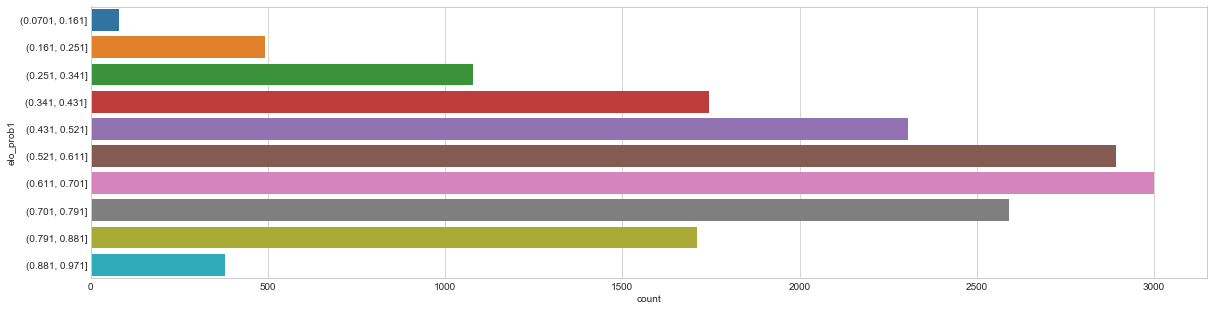

In [4]:
dataset_bin['elo_prob1'] = pd.cut(data_2['elo_prob1'], 10)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="elo_prob1", data=dataset_bin);

#### Conclusion:
- Idealy, the distribution of 0s and 1s in result1, which indicates whether team1 won, should roughly be even, since it is not indicated that team1 has advantage over team2 in the given data set. However, from the graph, the times team1 won is a lot more than they lose.
- Combined with graph2, which count the probablity of team1 winning, we found that the majority of the probablity falls into the range 0.431 - 0.791. It indicates that most of time, team1 has a better chance to win, which verify the conclusion we had from graph1.

### 3. Bi-variate: elo_prob1 vs. score_diff
- Explore the realation between elo_prob1 and score_diff

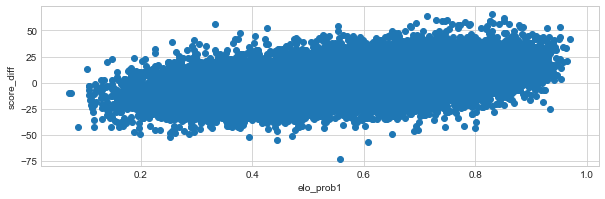

In [5]:
f, axs = plt.subplots(1,1,figsize=(10,10))
plt.subplot(311)
plt.xlabel("elo_prob1")
plt.ylabel("score_diff")
plt.scatter(data_2.elo_prob1, data_2.score_diff)

#### Conclusion
- As the win probablity of team1 increases, the score_diff, which calculated by team1_score - team2_score, is also increasing. 
- It can be concluded that the score_diff is positively proportional to the elo_prob1.

### 4. Bi-variate: season vs. score_diff
- Explore the realtion between the season and score_diff

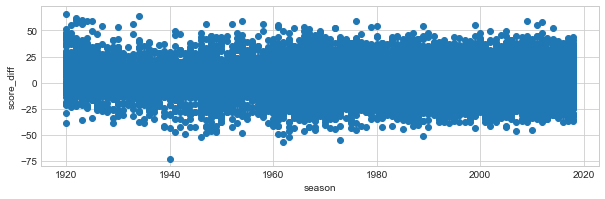

In [6]:
f, axs = plt.subplots(1,1,figsize=(10,10))
plt.subplot(311)
plt.xlabel("season")
plt.ylabel("score_diff")
plt.scatter(data_2.season, data_2.score_diff)

#### Conclusion
- Since the graph is very scattered, it can be concluded that season has little relation the score of the game and has little contribution when predicting the score given two teams.

## Ⅱ. Regression Model

### 0. Remove useless information

In [7]:
del data_2["score_diff"]
del data_2["result1"]
del data_2["date"]
del data_2["season"]
del data_2["neutral"]
del data_2["playoff"]

### 0.2 Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_2.iloc[:,:] = data_2.iloc[:,:].apply(
    lambda col:le.fit_transform(col)
)
data_2

,team1,team2,elo1,elo2,elo_prob1,score1,score2
0,84,94,7932,473,14839,47,0
1,0,105,7897,473,14830,42,0
2,80,0,7897,473,14830,9,0
3,28,25,7268,8188,7365,13,0
4,84,67,8615,6659,9572,44,0
...,...,...,...,...,...,...,...
16269,65,56,14361,14651,7553,40,26
16270,67,79,15053,14234,9477,19,12
16271,67,58,15320,14669,9396,22,24
16272,49,70,15199,14998,8526,30,35


### 1. Data Training

In [9]:
from sklearn.model_selection import train_test_split

independant = [i for i in data_2.columns.tolist() if (i != "score1" and i != "score2")]
dependant = ["score1", "score2"]

x = data_2[independant]
y = data_2[dependant]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

### 2. Regression

### 2.1 Decision Tree:

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor(random_state = 0)
dt = dt.fit(x_train, y_train)

print("Decision Tree Regressor: ")
print("Training R^2: %4.4f" % r2_score(y_train, dt.predict(x_train), multioutput = 'variance_weighted'))
print("Testing R^2: %4.4f" % r2_score(y_test, dt.predict(x_test), multioutput = 'variance_weighted'))

Decision Tree Regressor: 
Training R^2: 1.0000
Testing R^2: -0.8286


### 2.2 Random Forest:

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf = rf.fit(x_train, y_train)

print("Random Forest Regressor: ")
print("Training R^2: %4.4f" % r2_score(y_train, rf.predict(x_train), multioutput = 'variance_weighted'))
print("Testing R^2: %4.4f" % r2_score(y_test, rf.predict(x_test), multioutput = 'variance_weighted'))

Random Forest Regressor: 
Training R^2: 0.8665
Testing R^2: 0.0454


#### Conclusion
- Note that Decision Tree has a R^2 of 1 for Traning data and -0.8 for testing data, which indicates that the overfitting exists. 
- Considering the R^2 for random forest is 0.0454, the results given by random forest is relatively more reliable. 